In [1]:
import pandas as pd
import datetime

In [2]:
original_data = pd.read_csv('../データ/st_data.csv')

# データについて

In [3]:
original_data

,entering_date,reserve_content_1,reserve_content_2,n_person,admin_tag,accept_date,year,month,day,reserved_date,status,vistor_manage,manage_memo,manage_memo_2,reservation_type,amount,discaunt,preamount,payment_status
0,2021/03/31,来場予約,喫茶付き入場券,1,"来場確認,決済済,当日飛込",3/31/21 16:36,2021,3,31,2021/03/31,確定,NaN,NaN,NaN,NaN,1600.0,NaN,NaN,NaN
1,2021/03/31,来場予約,\n喫茶付き入場券\n,1,"来場確認,決済済,当日飛込",3/31/21 16:53,2021,3,31,2021/03/31,確定,NaN,NaN,NaN,NaN,1600.0,NaN,NaN,NaN
2,2021/03/31,来場予約,\n喫茶付き入場券\n,2,"来場確認,決済済,当日飛込",3/31/21 16:54,2021,3,31,2021/03/31,確定,NaN,NaN,NaN,NaN,3200.0,NaN,NaN,NaN
3,2021/03/31,来場予約,\n入場券\n,2,"来場確認,決済済,当日飛込",3/31/21 16:28,2021,3,31,2021/03/31,確定,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,NaN
4,2021/03/31,来場予約,\n入場券\n,2,NaN,3/31/21 16:30,2021,3,31,2021/03/31,確定,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,2021/04/01,来場予約,\n入場券\n,3,"来場確認,決済済,当日飛込",2004/1/21 12:07,2021,4,1,2021/04/01,確定,NaN,NaN,NaN,NaN,1800.0,NaN,NaN,NaN
19658,2021/04/01,来場予約,\n喫茶付き入場券\n,1,NaN,3/31/21 18:22,2021,3,31,2021/03/31,確定,NaN,敬老パス,各種減免（対象は上記リンクよりご確認ください）※ ［1名］,NaN,1600.0,-600.0,1000.0,決済済み
19659,2021/04/01,来場予約,\n入場券\n,2,"減免,来場確認,決済済,当日飛込",2004/1/21 12:06,2021,4,1,2021/04/01,確定,NaN,うち1名キャンパス文化パートナーズ,NaN,NaN,1200.0,NaN,NaN,NaN
19660,2021/04/01,来場予約,\n入場券\n,1,"減免,来場確認,当日飛込",2004/1/21 9:45,2021,4,1,2021/04/01,確定,NaN,NaN,各種減免（対象は上記リンクよりご確認ください）※ ［1名］,NaN,600.0,-600.0,NaN,NaN


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   entering_date      19662 non-null  object 
 1   reserve_content_1  19662 non-null  object 
 2   reserve_content_2  19421 non-null  object 
 3   n_person           19662 non-null  int64  
 4   admin_tag          17056 non-null  object 
 5   accept_date        19662 non-null  object 
 6   year               19662 non-null  int64  
 7   month              19662 non-null  int64  
 8   day                19662 non-null  int64  
 9   reserved_date      19662 non-null  object 
 10  status             19662 non-null  object 
 11  vistor_manage      1 non-null      object 
 12  manage_memo        2457 non-null   object 
 13  manage_memo_2      11039 non-null  object 
 14  reservation_type   0 non-null      float64
 15  amount             19421 non-null  float64
 16  discaunt           231

# columns整形

## entering_data

object→datetime

In [5]:
original_data['entering_date'].head()

0    2021/03/31
1    2021/03/31
2    2021/03/31
3    2021/03/31
4    2021/03/31
Name: entering_date, dtype: object

In [6]:
original_data['entering_date'] = pd.to_datetime(original_data['entering_date'])

## reserve_content_1

全て来場予約なので削除

In [7]:
original_data['reserve_content_1'].describe()

count     19662
unique        1
top        来場予約
freq      19662
Name: reserve_content_1, dtype: object

In [8]:
original_data = original_data.drop('reserve_content_1', axis=1)

## reserve_content_2

In [9]:
original_data['reserve_content_2'].isnull().sum()

241

In [10]:
original_data['reserve_content_2'].unique()

array(['喫茶付き入場券', '\n喫茶付き入場券\n', '\n入場券\n', nan, '\n（旧）喫茶とお土産付き入場券\n',
       '\n（旧）喫茶付き入場券\n', '\n喫茶とお土産付き入場券\n'], dtype=object)

In [11]:
original_data.loc[(original_data['reserve_content_2']=='喫茶付き入場券'), 'reserve_content_2'] = '\n喫茶付き入場券\n'

In [12]:
original_data['reserve_content_2'].unique()

array(['\n喫茶付き入場券\n', '\n入場券\n', nan, '\n（旧）喫茶とお土産付き入場券\n',
       '\n（旧）喫茶付き入場券\n', '\n喫茶とお土産付き入場券\n'], dtype=object)

In [13]:
original_data[original_data['reserve_content_2']=='nan']

,entering_date,reserve_content_2,n_person,admin_tag,accept_date,year,month,day,reserved_date,status,vistor_manage,manage_memo,manage_memo_2,reservation_type,amount,discaunt,preamount,payment_status


入場券 = 1, 喫茶付き入場券 = 2, 喫茶とお土産付き入場券 = 3,（旧）喫茶付き入場券 = 4, （旧）喫茶とお土産付き入場券 = 5  
null = -1 基本的には当日飛び込みの方になる

In [14]:
original_data.loc[(original_data['reserve_content_2']=='\n入場券\n'), 'reserve_content_2'] = 1
original_data.loc[(original_data['reserve_content_2']=='\n喫茶付き入場券\n'), 'reserve_content_2'] = 2
original_data.loc[(original_data['reserve_content_2']=='\n喫茶とお土産付き入場券\n'), 'reserve_content_2'] = 3
original_data.loc[(original_data['reserve_content_2']=='\n（旧）喫茶付き入場券\n'), 'reserve_content_2'] = 4
original_data.loc[(original_data['reserve_content_2']=='\n（旧）喫茶とお土産付き入場券\n'), 'reserve_content_2'] = 5
original_data.loc[(original_data['reserve_content_2']=='nan'), 'reserve_content_2'] = -1
original_data['reserve_content_2'].fillna(-1, inplace=True)

In [15]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   entering_date      19662 non-null  datetime64[ns]
 1   reserve_content_2  19662 non-null  int64         
 2   n_person           19662 non-null  int64         
 3   admin_tag          17056 non-null  object        
 4   accept_date        19662 non-null  object        
 5   year               19662 non-null  int64         
 6   month              19662 non-null  int64         
 7   day                19662 non-null  int64         
 8   reserved_date      19662 non-null  object        
 9   status             19662 non-null  object        
 10  vistor_manage      1 non-null      object        
 11  manage_memo        2457 non-null   object        
 12  manage_memo_2      11039 non-null  object        
 13  reservation_type   0 non-null      float64       
 14  amount

## n_person

In [16]:
original_data['n_person'].describe()

count    19662.000000
mean         2.124352
std          2.745286
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         43.000000
Name: n_person, dtype: float64

## admin_tag

In [17]:
original_data['admin_tag'].unique()

array(['来場確認,決済済,当日飛込', nan, '来場確認', '減免,来場確認,決済済,当日飛込', '来場確認,決済済',
       '【確定】電話予約', '当日飛込,来場確認,決済済', '当日飛込', '決済済,当日飛込', '来場確認,【確定】電話予約',
       '当日飛込,決済済,来場確認', '来場確認,当日飛込,決済済', '決済済', '来場確認,決済済,【確定】電話予約',
       '減免,来場確認,決済済', '来場確認,決済済,当日飛込,減免', '減免,当日飛込,来場確認,決済済',
       '減免,来場確認,当日飛込,決済済', '決済済,来場確認', '当日飛込,来場確認', '来場確認,当日飛込',
       '決済済,来場確認,当日飛込', '決済済,来場確認,【確定】電話予約', '決済済,当日飛込,来場確認',
       '減免,当日飛込,決済済,来場確認', '減免,来場確認,当日飛込', '減免,当日飛込,来場確認', '減免,来場確認',
       '減免,当日飛込', '当日飛込,来場確認,決済済,減免', '減免,【確定】電話予約', '来場確認,減免',
       '当日飛込,決済済,来場確認,減免', '当日飛込,決済済,来場確認,【確定】電話予約',
       '決済済,当日飛込,来場確認,【確定】電話予約', '来場確認,減免,当日飛込', '当日飛込,減免,来場確認',
       '来場確認,決済済,銀行振込・後納', '来場確認,減免,決済済,当日飛込', '来場確認,決済済,当日飛込,【確定】電話予約',
       '★新型コロナウィルスCXL,知財ツアー,銀行振込・後納', '当日飛込,決済済', '来場確認,決済済,減免',
       '決済済,来場確認,減免,【確定】電話予約,当日飛込', '当日飛込,減免', '【確定】電話予約,来場確認,決済済',
       '減免,来場確認,決済済,【確定】電話予約', '来場確認,減免,【確定】電話予約', '来場確認,決済済,減免,【確定】電話予約',
       '【確定】電話予約,決済済,来場確認', '減免,決済済,【確定】電話予約,来場確認', '来場確認,【申請書未】電話予

In [18]:
names = ['来場確認', '決済済', '当日飛込', '減免', '【確定】電話予約', '★新型コロナウィルスCXL', '知財ツアー', '銀行振込・後納', '社長案件', '！！承認保留！！', 
         '本社関係者', '撮影・取材', '本社経費', '【申請書未】電話予約', '本社来送', '本社経費', '打ち合わせ']

In [19]:
for i, name in enumerate(names):
    new_col = 'admin_tag_' + name
    original_data[new_col] = original_data['admin_tag'].str.contains(name, na=False)
    original_data[new_col] = original_data[new_col].apply(lambda x: 1 if x else 0)

In [20]:
original_data

,entering_date,reserve_content_2,n_person,admin_tag,accept_date,year,month,day,reserved_date,status,...,admin_tag_知財ツアー,admin_tag_銀行振込・後納,admin_tag_社長案件,admin_tag_！！承認保留！！,admin_tag_本社関係者,admin_tag_撮影・取材,admin_tag_本社経費,admin_tag_【申請書未】電話予約,admin_tag_本社来送,admin_tag_打ち合わせ
0,2021-03-31,2,1,"来場確認,決済済,当日飛込",3/31/21 16:36,2021,3,31,2021/03/31,確定,...,0,0,0,0,0,0,0,0,0,0
1,2021-03-31,2,1,"来場確認,決済済,当日飛込",3/31/21 16:53,2021,3,31,2021/03/31,確定,...,0,0,0,0,0,0,0,0,0,0
2,2021-03-31,2,2,"来場確認,決済済,当日飛込",3/31/21 16:54,2021,3,31,2021/03/31,確定,...,0,0,0,0,0,0,0,0,0,0
3,2021-03-31,1,2,"来場確認,決済済,当日飛込",3/31/21 16:28,2021,3,31,2021/03/31,確定,...,0,0,0,0,0,0,0,0,0,0
4,2021-03-31,1,2,NaN,3/31/21 16:30,2021,3,31,2021/03/31,確定,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,2021-04-01,1,3,"来場確認,決済済,当日飛込",2004/1/21 12:07,2021,4,1,2021/04/01,確定,...,0,0,0,0,0,0,0,0,0,0
19658,2021-04-01,2,1,NaN,3/31/21 18:22,2021,3,31,2021/03/31,確定,...,0,0,0,0,0,0,0,0,0,0
19659,2021-04-01,1,2,"減免,来場確認,決済済,当日飛込",2004/1/21 12:06,2021,4,1,2021/04/01,確定,...,0,0,0,0,0,0,0,0,0,0
19660,2021-04-01,1,1,"減免,来場確認,当日飛込",2004/1/21 9:45,2021,4,1,2021/04/01,確定,...,0,0,0,0,0,0,0,0,0,0


In [21]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   entering_date            19662 non-null  datetime64[ns]
 1   reserve_content_2        19662 non-null  int64         
 2   n_person                 19662 non-null  int64         
 3   admin_tag                17056 non-null  object        
 4   accept_date              19662 non-null  object        
 5   year                     19662 non-null  int64         
 6   month                    19662 non-null  int64         
 7   day                      19662 non-null  int64         
 8   reserved_date            19662 non-null  object        
 9   status                   19662 non-null  object        
 10  vistor_manage            1 non-null      object        
 11  manage_memo              2457 non-null   object        
 12  manage_memo_2            11039 n

## accept_date 

In [22]:
original_data['accept_date']

0          3/31/21 16:36
1          3/31/21 16:53
2          3/31/21 16:54
3          3/31/21 16:28
4          3/31/21 16:30
              ...       
19657    2004/1/21 12:07
19658      3/31/21 18:22
19659    2004/1/21 12:06
19660     2004/1/21 9:45
19661     2004/1/21 8:42
Name: accept_date, Length: 19662, dtype: object

In [23]:
original_data['accept_date'] = pd.to_datetime(original_data['accept_date'])

In [24]:
original_data['accept_date']

0       2021-03-31 16:36:00
1       2021-03-31 16:53:00
2       2021-03-31 16:54:00
3       2021-03-31 16:28:00
4       2021-03-31 16:30:00
                ...        
19657   2004-01-21 12:07:00
19658   2021-03-31 18:22:00
19659   2004-01-21 12:06:00
19660   2004-01-21 09:45:00
19661   2004-01-21 08:42:00
Name: accept_date, Length: 19662, dtype: datetime64[ns]

<AxesSubplot:>

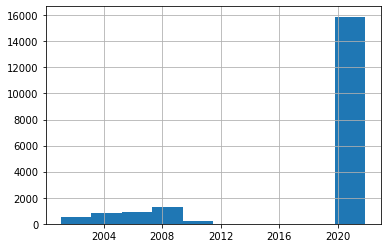

In [25]:
original_data['accept_date'].hist()

悲しいことにデータはバグってる....　　  
もらってる段階だと生きてるデータだが、どこでおかしくなった？  
reserved_dateと同じデータになるので削除

In [26]:
original_data.drop('accept_date', axis=1, inplace=True)

## year, month, day
entering_dateがもっているのでとりあえず削除

In [27]:
original_data.drop(['year', 'month', 'day'], axis=1, inplace=True)

## reserved_date

In [28]:
original_data['reserved_date']

0        2021/03/31
1        2021/03/31
2        2021/03/31
3        2021/03/31
4        2021/03/31
            ...    
19657    2021/04/01
19658    2021/03/31
19659    2021/04/01
19660    2021/04/01
19661    2021/04/01
Name: reserved_date, Length: 19662, dtype: object

In [29]:
original_data['reserved_date'] = pd.to_datetime(original_data['reserved_date'])

## status

In [30]:
original_data['status'].unique()

array(['確定', 'キャンセル'], dtype=object)

欠損値なしの2値なので  
確定 = 1  
キャンセル = 0  

In [31]:
original_data.loc[(original_data['status']=='キャンセル'), 'status'] = 0
original_data.loc[(original_data['status']=='確定'), 'status'] = 1

In [32]:
original_data['status'] = original_data['status'].astype(int)

## vistor_manage 

In [33]:
original_data['vistor_manage'].unique()

array([nan, '10/4/21 9:53'], dtype=object)

2021/10/4の一件だけ時間が記入されているだけの列、用途不明のため削除

In [34]:
original_data.drop('vistor_manage', axis=1, inplace=True)

## manage_memo

In [35]:
original_data['manage_memo'].value_counts()[0:40]

敬老パス                                                                         93
手帳                                                                           32
メール送付（4／24村田）                                                                25
敬老                                                                           24
地質調査連絡済み（7／10村田）                                                             20
敬老減免                                                                         14
敬老パス提示                                                                       14
手帳ご提示                                                                        13
緊急事態宣言の延長により、9／30まで臨時閉場となったため全額返金（9／11田中）                                    13
初釜イベント予約枠押さえ（10／27嶋野）                                                        12
手帳2名                                                                         11
再開場通知メール送付済み（5／30嶋野）                                                         11
キャンパス文化パートナーズ                           

必要なさそう  
敬老系  
手帳系  
メール送付（4／24村田）  
地質調査連絡済み（7／10村田）  
再開場通知メール送付済み（5／30嶋野）  
キャンパス文化パートナーズ  
以下少数のもの  

必要そう  
緊急事態宣言の延長により、9／30まで臨時閉場となったため全額返金（9／11田中） : 無鱗庵の事情関係なくキャンセルになったものなので該当レコードは削除してよい？  
初釜イベント予約枠押さえ（10／27嶋野） : 該当レコードはすべてキャンセルされているので事情あり？  


In [36]:
original_data = original_data[original_data['manage_memo']!='緊急事態宣言の延長により、9／30まで臨時閉場となったため全額返金（9／11田中）']
original_data = original_data[original_data['manage_memo']!='初釜イベント予約枠押さえ（10／27嶋野）']

In [37]:
original_data.drop('manage_memo', axis=1, inplace=True)

## manage_memo2

In [38]:
original_data['manage_memo_2'].value_counts()[0:40]

一般入場 ［2名］                                           4708
一般入場 ［1名］                                           3032
一般入場 ［3名］                                            622
各種減免（対象は上記リンクよりご確認ください）※ ［1名］                        566
各種減免（対象は上記リンクよりご確認ください）※ ［2名］                        520
一般入場 ［4名］                                            260
京都市キャンパス文化パートナーズ制度に入会の大学生･短期大学生※ ［1名］                214
「庭の日」＊毎月28日限定 ［1名］                                   205
「庭の日」＊毎月28日限定 ［2名］                                   177
一般入場 ［1名］\n京都市キャンパス文化パートナーズ制度に入会の大学生･短期大学生※ ［1名］     123
京都市キャンパス文化パートナーズ制度に入会の大学生･短期大学生※ ［2名］                117
一般入場 ［5名］                                             60
一般入場 ［1名］\n各種減免（対象は上記リンクよりご確認ください）※ ［1名］              48
一般入場 ［1名］\n「庭の日」＊毎月28日限定 ［1名］                         37
一般入場 ［6名］                                             36
各種減免（対象は上記リンクよりご確認ください）※ ［3名］                         26
一般入場 ［2名］\n各種減免（対象は上記リンクよりご確認ください）※ ［1名］              25
一般入場 ［2名］\n京都市キャンパス文化パートナーズ制度に入

各種減免 : 基本的に600円引き  
京都市キャンパス文化 : 500円引き  
庭の日 : 600円引き

In [39]:
original_data['exemption'] = original_data['manage_memo_2'].str.contains('各種減免', na=False)
original_data['exemption'] = original_data['exemption'].apply(lambda x: 1 if x else 0)

In [40]:
original_data['campus'] = original_data['manage_memo_2'].str.contains('京都市キャンパス文化', na=False)
original_data['campus'] = original_data['campus'].apply(lambda x: 1 if x else 0)

In [41]:
original_data['garden_day'] = original_data['manage_memo_2'].str.contains('庭の日', na=False)
original_data['garden_day'] = original_data['garden_day'].apply(lambda x: 1 if x else 0)

In [42]:
original_data['garden_day'].describe()

count    19637.000000
mean         0.023171
std          0.150449
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: garden_day, dtype: float64

In [43]:
original_data.drop('manage_memo_2', axis=1, inplace=True)

In [44]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19637 entries, 0 to 19661
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   entering_date            19637 non-null  datetime64[ns]
 1   reserve_content_2        19637 non-null  int64         
 2   n_person                 19637 non-null  int64         
 3   admin_tag                17043 non-null  object        
 4   reserved_date            19637 non-null  datetime64[ns]
 5   status                   19637 non-null  int64         
 6   reservation_type         0 non-null      float64       
 7   amount                   19396 non-null  float64       
 8   discaunt                 2308 non-null   float64       
 9   preamount                9616 non-null   float64       
 10  payment_status           9616 non-null   object        
 11  admin_tag_来場確認           19637 non-null  int64         
 12  admin_tag_決済済            19637 n

## reservation_type
全部NULL

In [45]:
original_data.drop('reservation_type', axis=1, inplace=True)

## amount

In [46]:
original_data['amount'].isnull().sum()

241

基本的には人数*600なのでそれで補う  
割引は記入されていないので、無いこととする  
多分予約フォームからじゃないと割引効かないよね

In [47]:
original_data['amount'].fillna(original_data['n_person']*600, inplace=True)

## discount

In [48]:
original_data.rename(columns={'discaunt' : 'discount'}, inplace=True)

Nanは0で補完

In [49]:
original_data['discount'].fillna(0, inplace=True)

In [50]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19637 entries, 0 to 19661
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   entering_date            19637 non-null  datetime64[ns]
 1   reserve_content_2        19637 non-null  int64         
 2   n_person                 19637 non-null  int64         
 3   admin_tag                17043 non-null  object        
 4   reserved_date            19637 non-null  datetime64[ns]
 5   status                   19637 non-null  int64         
 6   amount                   19637 non-null  float64       
 7   discount                 19637 non-null  float64       
 8   preamount                9616 non-null   float64       
 9   payment_status           9616 non-null   object        
 10  admin_tag_来場確認           19637 non-null  int64         
 11  admin_tag_決済済            19637 non-null  int64         
 12  admin_tag_当日飛込           19637 n

# preamount

In [53]:
original_data['preamount']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
19657       NaN
19658    1000.0
19659       NaN
19660       NaN
19661    1600.0
Name: preamount, Length: 19637, dtype: float64

欠損値は0をで補完

In [57]:
original_data['preamount'].fillna(0, inplace=True)

## payment_status

In [58]:
original_data['payment_status'].unique()

array([nan, '決済済み', '払い戻し済み'], dtype=object)

列を分解

In [60]:
original_data['payment_status_決済済'] = 0
original_data.loc[original_data['payment_status']=='決済済み', 'payment_status_決済済'] = 1

In [61]:
original_data['payment_status_払い戻し済み'] = 0
original_data.loc[original_data['payment_status']=='払い戻し済み', 'payment_status_払い戻し済み'] = 1

In [65]:
original_data.drop('payment_status', axis=1, inplace=True)

# 最終結果

In [66]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19637 entries, 0 to 19661
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   entering_date            19637 non-null  datetime64[ns]
 1   reserve_content_2        19637 non-null  int64         
 2   n_person                 19637 non-null  int64         
 3   admin_tag                17043 non-null  object        
 4   reserved_date            19637 non-null  datetime64[ns]
 5   status                   19637 non-null  int64         
 6   amount                   19637 non-null  float64       
 7   discount                 19637 non-null  float64       
 8   preamount                19637 non-null  float64       
 9   admin_tag_来場確認           19637 non-null  int64         
 10  admin_tag_決済済            19637 non-null  int64         
 11  admin_tag_当日飛込           19637 non-null  int64         
 12  admin_tag_減免             19637 n

In [67]:
original_data.to_csv('no_Nan_data.csv', index=False)